In [87]:
# Task-1 Case-1
import time
import cvxpy as cp
import pandas as pd

# reading data from case_1.txt
with open("case_1.txt", "r") as file_1:
    coordinates = file_1.readlines()

# mapping coordinates into list of tuples
customers = [tuple(map(float, coordinate.strip().split(','))) for coordinate in coordinates]

# defining decision variables as x and y coordinates
facility_x_coord = cp.Variable()
facility_y_coord = cp.Variable()

# defining the objective function and problem to minimize the L1-norm 
objective_initial = 0
for customer in customers:
    objective_initial += cp.abs(facility_x_coord - customer[0]) + cp.abs(facility_y_coord - customer[1])

objective_function = cp.Minimize(objective_initial)
problem = cp.Problem(objective_function)

# start time
start_time = time.time()
# solving the problem
problem.solve()
# stop time
end_time = time.time()
# time difference
time_difference = end_time - start_time

# printing optimal solution
print("Task-1 optimal obj function value for case_1 is:", problem.value)
print("optimal coordinates:")
print("x coordinate: ", facility_x_coord.value)
print("y coordinate: ", facility_y_coord.value)
print("it took: ", time_difference)

# making a result list for Task-4
result_list_task_1_case_1 = [problem.value,facility_x_coord.value,facility_y_coord.value,time_difference]



Task-1 optimal obj function value for case_1 is: 53316.42571258239
optimal coordinates:
x coordinate:  508.23930856031905
y coordinate:  465.0093737116429
it took:  0.1980128288269043


In [46]:
# Task-1 for Case-2
import time
import cvxpy as cp

# reading data from case_2.txt
with open("case_2.txt", "r") as file_2:
    coordinates = file_2.readlines()

# mapping coordinates into list of tuples
customers = [tuple(map(float, coordinate.strip().split(','))) for coordinate in coordinates]

# defining decision variables as x and y coordinates
facility_x_coord = cp.Variable()
facility_y_coord = cp.Variable()

# defining the objective function and problem to minimize the L1-norm 
objective_initial = 0
for customer in customers:
    objective_initial += cp.abs(facility_x_coord - customer[0]) + cp.abs(facility_y_coord - customer[1])

objective_function = cp.Minimize(objective_initial)

problem = cp.Problem(objective_function)

# start time
start_time = time.time()
# solving the problem
problem.solve()
# stop time
end_time = time.time()
# time difference
time_difference = end_time - start_time

# printing optimal solution
print("Task-1 optimal obj function value for case_2 is:", problem.value)
print("optimal coordinates:")
print("x coordinate: ", facility_x_coord.value)
print("y coordinate: ", facility_y_coord.value)
print("it took: ", time_difference)

# initializing result list
init_list()
# appending results
append_results(1,facility_x_coord.value,facility_y_coord.value,problem.value,time_difference)

# making a result list for Task-4
result_list_task_1_case_2 = [problem.value,facility_x_coord.value,facility_y_coord.value,time_difference]

C:\Users\egeca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\cvxpy\problems\problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


Task-1 optimal obj function value for case_2 is: 494396.79452087963
optimal coordinates:
x coordinate:  727.9402755698338
y coordinate:  667.0981723005167
it took:  1.6456718444824219


In [47]:
# Task-1 for Case-3
import time
import cvxpy as cp


# reading data from case_1.txt
with open("case_3.txt", "r") as file_3:
    coordinates = file_3.readlines()

# mapping coordinates into list of tuples
customers = [tuple(map(float, coordinate.strip().split(','))) for coordinate in coordinates]

# defining decision variables as x and y coordinates
facility_x_coord = cp.Variable()
facility_y_coord = cp.Variable()

# defining the objective function and problem to minimize the L1-norm 
objective_initial = 0
for customer in customers:
    objective_initial += cp.abs(facility_x_coord - customer[0]) + cp.abs(facility_y_coord - customer[1])

objective_function = cp.Minimize(objective_initial)

problem = cp.Problem(objective_function)

# start time
start_time = time.time()
# solving the problem
problem.solve()
# stop time
end_time = time.time()
# time difference
time_difference = end_time - start_time

# printing optimal solution
print("Task-1 optimal obj function value for case_3 is:", problem.value)
print("optimal coordinates:")
print("x coordinate: ", facility_x_coord.value)
print("y coordinate: ", facility_y_coord.value)
print("it took: ", time_difference)

# initializing result list
init_list()
# appending results
append_results(2,facility_x_coord.value,facility_y_coord.value,problem.value,time_difference)

# making a result list for Task-4
result_list_task_1_case_3 = [problem.value,facility_x_coord.value,facility_y_coord.value,time_difference]

Task-1 optimal obj function value for case_3 is: 4244747.28522699
optimal coordinates:
x coordinate:  314.63987202883413
y coordinate:  485.2519437707528
it took:  27.21601676940918


In [66]:
# Task-2 Case-1
import time
import pulp

# reading coordinates from case_1.txt
with open("case_1.txt", "r") as file_1:
    coordinates = file_1.readlines()

# mapping coordinates into list of tuples
customers = [tuple(map(float, coord.strip().split(','))) for coord in coordinates]

# defining LP problem
problem = pulp.LpProblem("facility_location_problem", pulp.LpMinimize)

# defining decision variables >= 0
facility_x_coord = pulp.LpVariable("facility_x", lowBound=0)  
facility_y_coord = pulp.LpVariable("facility_y", lowBound=0)

# creating absolute difference variables for distance differences to linearize NLP
difference_x = pulp.LpVariable.dicts("difference_x", range(len(customers)), lowBound=0)
difference_y = pulp.LpVariable.dicts("difference_y", range(len(customers)), lowBound=0)

# adding objective function into the problem
problem += pulp.lpSum(difference_x[i] + difference_y[i] for i in range(len(customers)))

# constraints for distance differences
for i in range(len(customers)):
    problem += difference_x[i] >= facility_x_coord - customers[i][0]
    problem += difference_x[i] >= customers[i][0] - facility_x_coord
    problem += difference_y[i] >= facility_y_coord - customers[i][1]
    problem += difference_y[i] >= customers[i][1] - facility_y_coord
    
# start time
start_time = time.time()
# solving the problem
problem.solve()
# stop time
end_time = time.time()
# time difference
time_difference = end_time - start_time

# printing optimal solution
print("Task-2 optimal obj function value for case_1 is:", pulp.value(problem.objective))
print("optimal coordinates of facility is:")
print("x coordinate: ", pulp.value(facility_x_coord))
print("y coordinate: ", pulp.value(facility_y_coord))
print("it took: ", time_difference)

# making a result list for Task-4
result_list_task_2_case_1 = [pulp.value(problem.objective),pulp.value(facility_x_coord),pulp.value(facility_y_coord),time_difference]


Task-2 optimal obj function value for case_1 is: 53316.42573815995
optimal coordinates of facility is:
x coordinate:  483.6907
y coordinate:  425.78876
it took:  0.04100346565246582
[53316.42573815995, 483.6907, 425.78876, 0.04100346565246582]


In [64]:
# Task-2 Case-2
import time
import pulp

# reading coordinates from case_2.txt
with open("case_2.txt", "r") as file_2:
    coordinates = file_2.readlines()

# mapping coordinates into list of tuples
customers = [tuple(map(float, coord.strip().split(','))) for coord in coordinates]

# defining LP problem
problem = pulp.LpProblem("facility_location_problem", pulp.LpMinimize)

# defining decision variables >= 0
facility_x_coord = pulp.LpVariable("facility_x", lowBound=0)  
facility_y_coord = pulp.LpVariable("facility_y", lowBound=0)

# creating absolute difference variables for distance differences to linearize NLP
difference_x = pulp.LpVariable.dicts("difference_x", range(len(customers)), lowBound=0)
difference_y = pulp.LpVariable.dicts("difference_y", range(len(customers)), lowBound=0)

# adding objective function into the problem
problem += pulp.lpSum(difference_x[i] + difference_y[i] for i in range(len(customers)))

# constraints for distance differences
for i in range(len(customers)):
    problem += difference_x[i] >= facility_x_coord - customers[i][0]
    problem += difference_x[i] >= customers[i][0] - facility_x_coord
    problem += difference_y[i] >= facility_y_coord - customers[i][1]
    problem += difference_y[i] >= customers[i][1] - facility_y_coord

# start time
start_time = time.time()
# solving the problem
problem.solve()
# stop time
end_time = time.time()
# time difference
time_difference = end_time - start_time

# printing optimal solution
print("Task-2 optimal obj function value for case_2 is:", pulp.value(problem.objective))
print("optimal coordinates of facility is:")
print("x coordinate: ", pulp.value(facility_x_coord))
print("y coordinate: ", pulp.value(facility_y_coord))
print("it took: ", time_difference)

# making a result list for Task-4
result_list_task_2_case_2 = [pulp.value(problem.objective),pulp.value(facility_x_coord),pulp.value(facility_y_coord),time_difference]

Task-2 optimal obj function value for case_2 is: 494396.79440876126
optimal coordinates of facility is:
x coordinate:  729.38365
y coordinate:  667.54087
it took:  0.23302578926086426


In [91]:
# Task-2 Case-3
import time
import pulp


# reading coordinates from case_3.txt
with open("case_3.txt", "r") as file_3:
    coordinates = file_3.readlines()

# mapping coordinates into list of tuples
customers = [tuple(map(float, coord.strip().split(','))) for coord in coordinates]

# defining LP problem
problem = pulp.LpProblem("facility_location_problem", pulp.LpMinimize)

# defining decision variables >= 0
facility_x_coord = pulp.LpVariable("facility_x", lowBound=0)  
facility_y_coord = pulp.LpVariable("facility_y", lowBound=0)

# creating absolute difference variables for distance differences to linearize NLP
difference_x = pulp.LpVariable.dicts("difference_x", range(len(customers)), lowBound=0)
difference_y = pulp.LpVariable.dicts("difference_y", range(len(customers)), lowBound=0)

# adding objective function into the problem
problem += pulp.lpSum(difference_x[i] + difference_y[i] for i in range(len(customers)))

# constraints for distance differences
for i in range(len(customers)):
    problem += difference_x[i] >= facility_x_coord - customers[i][0]
    problem += difference_x[i] >= customers[i][0] - facility_x_coord
    problem += difference_y[i] >= facility_y_coord - customers[i][1]
    problem += difference_y[i] >= customers[i][1] - facility_y_coord
    
# start time
start_time = time.time()
# solving the problem
problem.solve()
# stop time
end_time = time.time()
# time difference
time_difference = end_time - start_time

# printing optimal solution
print("Task-2 optimal obj function value for case_3 is:", pulp.value(problem.objective))
print("optimal coordinates of facility is:")
print("x coordinate: ", pulp.value(facility_x_coord))
print("y coordinate: ", pulp.value(facility_y_coord))
print("it took: ", time_difference)

# making a result list for Task-4
result_list_task_2_case_3 = [pulp.value(problem.objective),pulp.value(facility_x_coord),pulp.value(facility_y_coord),time_difference]



Task-2 optimal obj function value for case_3 is: 4244747.285269197
optimal coordinates of facility is:
x coordinate:  314.64762
y coordinate:  485.25368
it took:  24.87961483001709


In [68]:
# Task-3 Case-1
import time as tm
from pulp import *


# reading coordinates from case_1.txt
with open("case_1.txt", "r") as file_1:
    coordinates = [tuple(map(float, line.replace(',', ' ').split())) for line in file_1]

# creating LP problem.
problem = LpProblem("facility_location_problem", LpMinimize)

# defining decision variables for the facility location.
facility_x_coord = LpVariable("facility_x")
facility_y_coord = LpVariable("facility_y")

# defining non-negative variables for distance differences for each customer.
t = LpVariable.dicts("t", (i for i in range(len(coordinates))), lowBound=0)
h = LpVariable.dicts("h", (i for i in range(len(coordinates))), lowBound=0)

# adding obj function which is minimizing sum of all t's and h's
problem += lpSum(t[i] + h[i] for i in range(len(coordinates)))

# adding constraints to represent Manhattan distance.
for i, (customer_x, customer_y) in enumerate(coordinates):
    problem += facility_x_coord - customer_x <= t[i]
    problem += customer_x - facility_x_coord <= t[i]
    problem += facility_y_coord - customer_y <= h[i]
    problem += customer_y - facility_y_coord <= h[i]

# start time
start_time = tm.time()
# solving the problem
problem.solve()
# stop time
end_time = tm.time()
# time difference
time_difference = end_time - start_time

# printing the optimal solution

print("Task-3 optimal obj function value for case_1 is: ", pulp.value(problem.objective))
print("optimal x coordinate is: ", pulp.value(facility_x_coord))
print("optimal y coordinate is: ", pulp.value(facility_y_coord))
print("it took: ", time_difference)

# making a result list for Task-4
result_list_task_3_case_1 = [pulp.value(problem.objective),pulp.value(facility_x_coord),pulp.value(facility_y_coord),time_difference]



Task-3 optimal obj function value for case_1 is:  53316.42571015998
optimal x coordinate is:  524.39938
optimal y coordinate is:  425.78876
it took:  0.03799891471862793


In [71]:
# Task-3 Case-2
import time as tm
from pulp import *


# reading coordinates from case_2.txt
with open("case_2.txt", "r") as file_2:
    coordinates = [tuple(map(float, line.replace(',', ' ').split())) for line in file_2]

# creating LP problem.
problem = LpProblem("facility_location_problem", LpMinimize)

# defining decision variables for the facility location.
facility_x_coord = LpVariable("facility_x")
facility_y_coord = LpVariable("facility_y")

# defining non-negative variables for distance differences for each customer.
t = LpVariable.dicts("t", (i for i in range(len(coordinates))), lowBound=0)
h = LpVariable.dicts("h", (i for i in range(len(coordinates))), lowBound=0)

# adding obj function which is minimizing sum of all t's and h's
problem += lpSum(t[i] + h[i] for i in range(len(coordinates)))

# adding constraints to represent Manhattan distance.
for i, (customer_x, customer_y) in enumerate(coordinates):
    problem += facility_x_coord - customer_x <= t[i]
    problem += customer_x - facility_x_coord <= t[i]
    problem += facility_y_coord - customer_y <= h[i]
    problem += customer_y - facility_y_coord <= h[i]

# start time
start_time = tm.time()
# solving the problem
problem.solve()
# stop time
end_time = tm.time()
# time difference
time_difference = end_time - start_time

# printing the optimal solution
print("Task-3 optimal obj function value for case_2 is: ", pulp.value(problem.objective))
print("optimal x coordinate is: ", pulp.value(facility_x_coord))
print("optimal y coordinate is: ", pulp.value(facility_y_coord))
print("it took: ", time_difference)

# making a result list for Task-4
result_list_task_3_case_2 = [pulp.value(problem.objective),pulp.value(facility_x_coord),pulp.value(facility_y_coord),time_difference]


Task-3 optimal obj function value for case_2 is:  494396.79440876126
optimal x coordinate is:  729.38365
optimal y coordinate is:  667.54087
it took:  0.22500157356262207


In [92]:
# Task-3 Case-3
import time as tm
from pulp import *

# reading coordinates from case_3.txt
with open("case_3.txt", "r") as file_3:
    coordinates = [tuple(map(float, line.replace(',', ' ').split())) for line in file_3]

# creating LP problem.
problem = LpProblem("facility_location_problem", LpMinimize)

# defining decision variables for the facility location.
facility_x_coord = LpVariable("facility_x")
facility_y_coord = LpVariable("facility_y")

# defining non-negative variables for distance differences for each customer.
t = LpVariable.dicts("t", (i for i in range(len(coordinates))), lowBound=0)
h = LpVariable.dicts("h", (i for i in range(len(coordinates))), lowBound=0)

# adding obj function which is minimizing sum of all t's and h's
problem += lpSum(t[i] + h[i] for i in range(len(coordinates)))

# adding constraints to represent Manhattan distance.
for i, (customer_x, customer_y) in enumerate(coordinates):
    problem += facility_x_coord - customer_x <= t[i]
    problem += customer_x - facility_x_coord <= t[i]
    problem += facility_y_coord - customer_y <= h[i]
    problem += customer_y - facility_y_coord <= h[i]

# start time
start_time = tm.time()
# solving the problem
problem.solve()
# stop time
end_time = tm.time()
# time difference
time_difference = end_time - start_time

# printing the optimal solution
print("Task-3 optimal obj function value for case_3 is: ", pulp.value(problem.objective))
print("optimal x coordinate is: ", pulp.value(facility_x_coord))
print("optimal y coordinate is: ", pulp.value(facility_y_coord))
print("it took: ", time_difference)

# making a result list for Task-4
result_list_task_3_case_3 = [pulp.value(problem.objective),pulp.value(facility_x_coord),pulp.value(facility_y_coord),time_difference]




Task-3 optimal obj function value for case_3 is:  4244747.285179718
optimal x coordinate is:  314.62119
optimal y coordinate is:  485.2503
it took:  24.647613048553467


In [93]:
# Task-4
pd.set_option('display.width', 10000000)  # or some large value like 1000

# creating a DataFrame to store the results for Case-1
results_df_case_1 = pd.DataFrame(columns=['n = 100', 'z*', 'x*', 'y*', 'Runtime in seconds'])
results_df_case_1.loc[0] = ["Task 1", result_list_task_1_case_1[0],result_list_task_1_case_1[1],result_list_task_1_case_1[2],result_list_task_1_case_1[3]]
results_df_case_1.loc[1] = ["Task 2", result_list_task_2_case_1[0],result_list_task_2_case_1[1],result_list_task_2_case_1[2],result_list_task_2_case_1[3]]
results_df_case_1.loc[2] = ["Task 3", result_list_task_3_case_1[0],result_list_task_3_case_1[1],result_list_task_3_case_1[2],result_list_task_3_case_1[3]]
print("Case 1 table")
print(results_df_case_1)
# creating a DataFrame to store the results for Case-2
results_df_case_2 = pd.DataFrame(columns=['n = 1000', 'z*', 'x*', 'y*', 'Runtime in seconds'])
results_df_case_2.loc[0] = ["Task 1", result_list_task_1_case_2[0],result_list_task_1_case_2[1],result_list_task_1_case_2[2],result_list_task_1_case_2[3]]
results_df_case_2.loc[1] = ["Task 2", result_list_task_2_case_2[0],result_list_task_2_case_2[1],result_list_task_2_case_2[2],result_list_task_2_case_2[3]]
results_df_case_2.loc[2] = ["Task 3", result_list_task_3_case_2[0],result_list_task_3_case_2[1],result_list_task_3_case_2[2],result_list_task_3_case_2[3]]
print("Case 2 table")
print(results_df_case_2)
# creating a DataFrame to store the results for Case-3
results_df_case_3 = pd.DataFrame(columns=['n = 10000', 'z*', 'x*', 'y*', 'Runtime in seconds'])
results_df_case_3.loc[0] = ["Task 1", result_list_task_1_case_3[0],result_list_task_1_case_3[1],result_list_task_1_case_3[2],result_list_task_1_case_3[3]]
results_df_case_3.loc[1] = ["Task 2", result_list_task_2_case_3[0],result_list_task_2_case_3[1],result_list_task_2_case_3[2],result_list_task_2_case_3[3]]
results_df_case_3.loc[2] = ["Task 3", result_list_task_3_case_3[0],result_list_task_3_case_3[1],result_list_task_3_case_3[2],result_list_task_3_case_3[3]]
print("Case 3 table")
print(results_df_case_3)


Case 1 table
  n = 100            z*                  x*                 y*  Runtime in seconds
0  Task 1  53316.425713  508.23930856031905  465.0093737116429            0.198013
1  Task 2  53316.425738            483.6907          425.78876            0.041003
2  Task 3  53316.425710           524.39938          425.78876            0.037999
Case 2 table
  n = 1000             z*                 x*                 y*  Runtime in seconds
0   Task 1  494396.794521  727.9402755698338  667.0981723005167            1.645672
1   Task 2  494396.794409          729.38365          667.54087            0.233026
2   Task 3  494396.794409          729.38365          667.54087            0.225002
Case 3 table
  n = 10000            z*                  x*                 y*  Runtime in seconds
0    Task 1  4.244747e+06  314.63987202883413  485.2519437707528           27.216017
1    Task 2  4.244747e+06           314.64762          485.25368           24.879615
2    Task 3  4.244747e+06           31

In [ ]:
# Task-5: Analysis and Conclusion.

# in Case-1, Task-1
"""There are x, y so 2 free decision variables and internal n*2 = 200 constraints."""
# in Case-1, Task-2
"""There are z's and x and y so 202 decision variables and n*4 = 400 constraints."""
# in Case-1, Task-3
"""There are t+'s, t-'s, h+'s, h-'s and x and y so 402 decision variables and  n*2 constraints plus n*4 nonnegativity constraints
so 600 constraints total."""

# in Case-2, Task-1
"""There are x, y so 2 free decision variables and internal n*2 = 2000 constraints."""
# in Case-2, Task-2
"""There are z's and x and y so 2002 decision variables and n*4 = 4000 constraints."""
# in Case-2, Task-3
"""There are t+'s, t-'s, h+'s, h-'s and x and y so 4002 decision variables and  n*2 constraints plus n*4 nonnegativity constraints
so 6000 constraints total."""

# in Case-3, Task-1
"""There are x, y so 2 free decision variables and internal n*2 = 20000 constraints."""
# in Case-3, Task-2
"""There are z's and x and y so 20002 decision variables and n*4 = 40000 constraints."""
# in Case-3, Task-3
"""There are t+'s, t-'s, h+'s, h-'s and x and y so 40002 decision variables and  n*2 constraints plus n*4 nonnegativity constraints
so 60000 constraints total."""

# conclusions
"""In all tasks, all ways to solve the problem regardless of being NLP or LP, runtime increases as n increases.
Also, regardless of n, the fastest way to solve facility location problem is Task 3. Formulating an LP with 
introducing two sets of non-negative decision variables, t's and h's.in a way that only one takes the value of
the absolute distance difference. Additionally, despite the number of constraints are multipled by 1.5 for each
task, the effect of this to runtime is different between task-1 and the others because the number of decision 
variables of task-1 is constant and very smaller than the other tasks."""




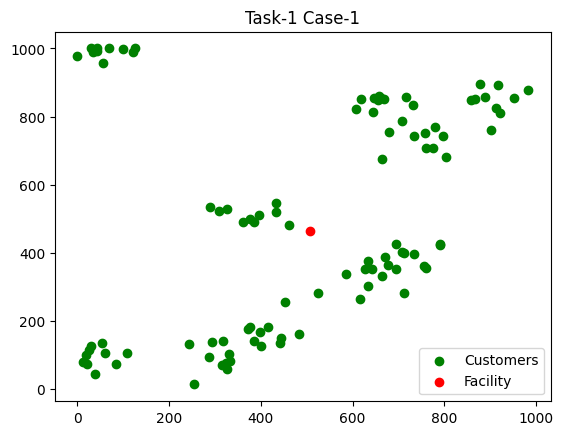

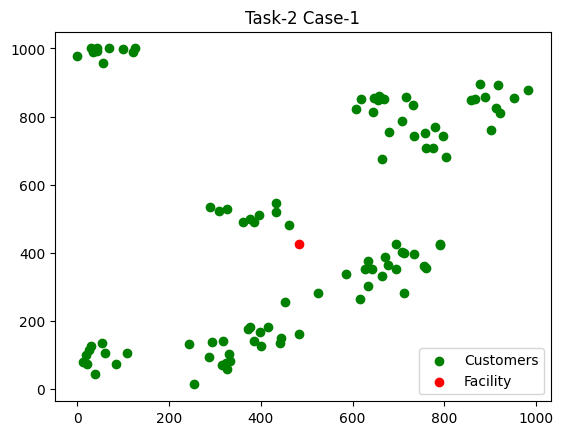

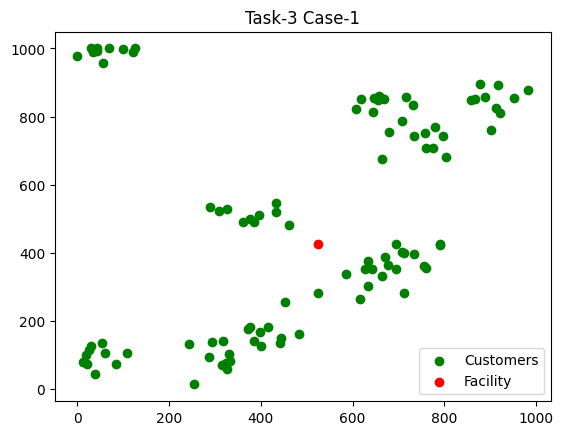

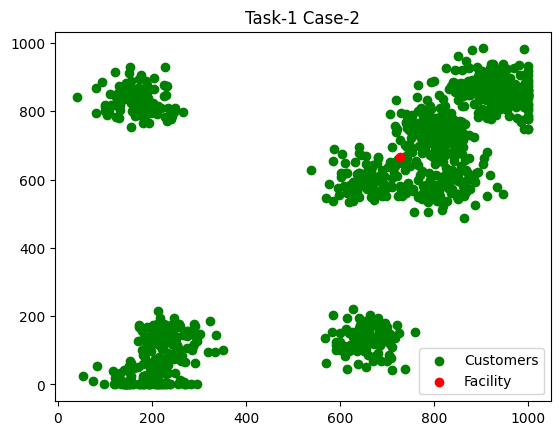

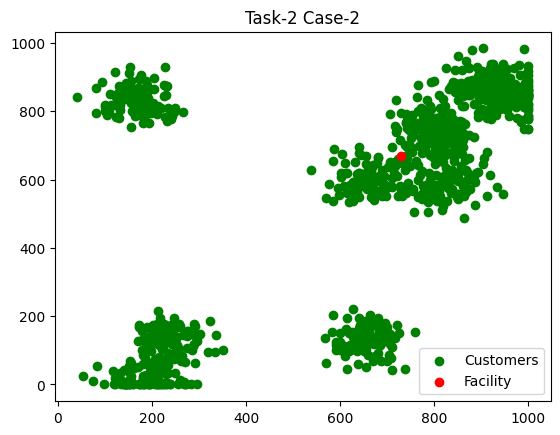

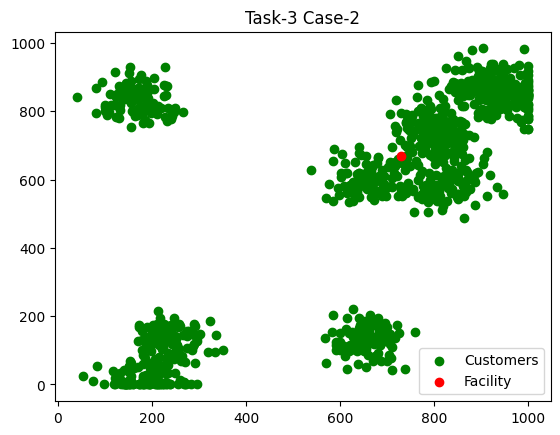

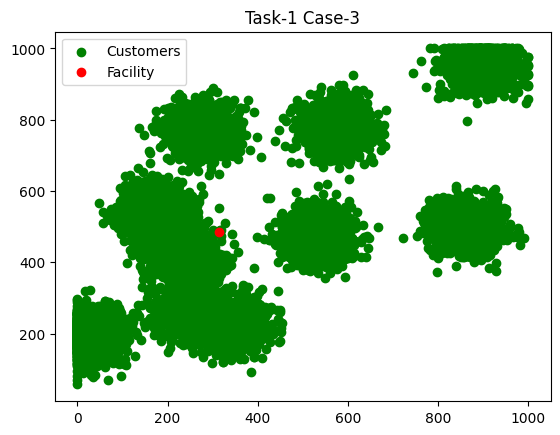

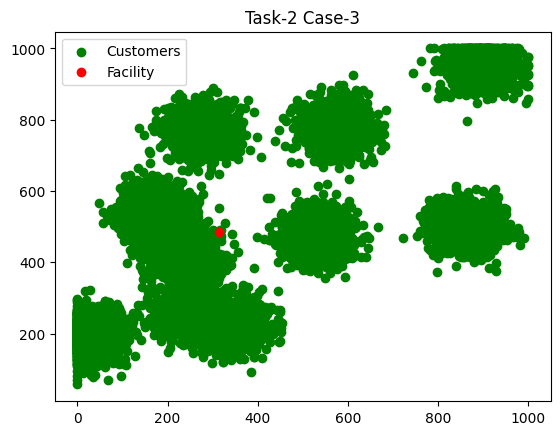

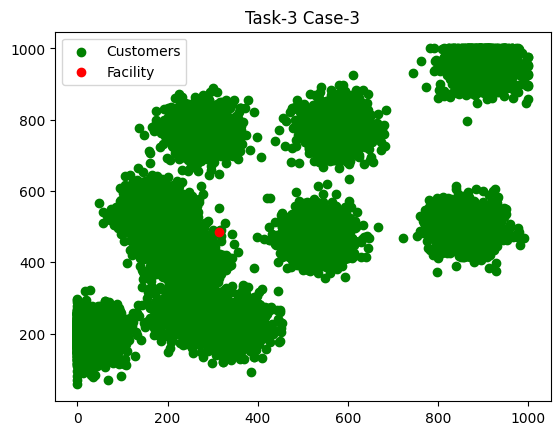

In [99]:
# Task-6
import matplotlib.pyplot as plt
# for task-1 case-1
# reading customer coordinates from the case_1.txt file
with open("case_1.txt", "r") as file_1:
    customer_coordinates = [tuple(map(float, line.strip().split(','))) for line in file_1]

facility_coordinates = (result_list_task_1_case_1[1], result_list_task_1_case_1[2])

# Plot customers
customer_x = [coord[0] for coord in customer_coordinates]
customer_y = [coord[1] for coord in customer_coordinates]
plt.scatter(customer_x, customer_y, color="green", label='Customers')

# Plot facility
plt.scatter(facility_coordinates[0], facility_coordinates[1], color='red', label='Facility')

# Add labels and legend
plt.title("Task-1 Case-1")
plt.legend()

# Show plot
plt.show()

# for task-2 case-1
# reading customer coordinates from the case_1.txt file
with open("case_1.txt", "r") as file_1:
    customer_coordinates = [tuple(map(float, line.strip().split(','))) for line in file_1]

facility_coordinates = (result_list_task_2_case_1[1], result_list_task_2_case_1[2])

# Plot customers
customer_x = [coord[0] for coord in customer_coordinates]
customer_y = [coord[1] for coord in customer_coordinates]
plt.scatter(customer_x, customer_y, color="green", label='Customers')

# Plot facility
plt.scatter(facility_coordinates[0], facility_coordinates[1], color='red', label='Facility')

# Add labels and legend
plt.title("Task-2 Case-1")
plt.legend()

# Show plot
plt.show()

# for task-3 case-1
# reading customer coordinates from the case_1.txt file
with open("case_1.txt", "r") as file_1:
    customer_coordinates = [tuple(map(float, line.strip().split(','))) for line in file_1]

facility_coordinates = (result_list_task_3_case_1[1], result_list_task_3_case_1[2])

# Plot customers
customer_x = [coord[0] for coord in customer_coordinates]
customer_y = [coord[1] for coord in customer_coordinates]
plt.scatter(customer_x, customer_y, color="green", label='Customers')

# Plot facility
plt.scatter(facility_coordinates[0], facility_coordinates[1], color='red', label='Facility')

# Add labels and legend
plt.title("Task-3 Case-1")
plt.legend()

# Show plot
plt.show()

# for task-1 case-2
# reading customer coordinates from the case_2.txt file
with open("case_2.txt", "r") as file_2:
    customer_coordinates = [tuple(map(float, line.strip().split(','))) for line in file_2]

facility_coordinates = (result_list_task_1_case_2[1], result_list_task_1_case_2[2])

# Plot customers
customer_x = [coord[0] for coord in customer_coordinates]
customer_y = [coord[1] for coord in customer_coordinates]
plt.scatter(customer_x, customer_y, color="green", label='Customers')

# Plot facility
plt.scatter(facility_coordinates[0], facility_coordinates[1], color='red', label='Facility')

# Add labels and legend
plt.title("Task-1 Case-2")
plt.legend()

# Show plot
plt.show()

# for task-2 case-2
# reading customer coordinates from the case_2.txt file
with open("case_2.txt", "r") as file_2:
    customer_coordinates = [tuple(map(float, line.strip().split(','))) for line in file_2]

facility_coordinates = (result_list_task_2_case_2[1], result_list_task_2_case_2[2])

# Plot customers
customer_x = [coord[0] for coord in customer_coordinates]
customer_y = [coord[1] for coord in customer_coordinates]
plt.scatter(customer_x, customer_y, color="green", label='Customers')

# Plot facility
plt.scatter(facility_coordinates[0], facility_coordinates[1], color='red', label='Facility')

# Add labels and legend
plt.title("Task-2 Case-2")
plt.legend()

# Show plot
plt.show()

# for task-3 case-2
# reading customer coordinates from the case_2.txt file
with open("case_2.txt", "r") as file_2:
    customer_coordinates = [tuple(map(float, line.strip().split(','))) for line in file_2]

facility_coordinates = (result_list_task_3_case_2[1], result_list_task_3_case_2[2])

# Plot customers
customer_x = [coord[0] for coord in customer_coordinates]
customer_y = [coord[1] for coord in customer_coordinates]
plt.scatter(customer_x, customer_y, color="green", label='Customers')

# Plot facility
plt.scatter(facility_coordinates[0], facility_coordinates[1], color='red', label='Facility')

# Add labels and legend
plt.title("Task-3 Case-2")
plt.legend()

# Show plot
plt.show()

# for task-1 case-3
# reading customer coordinates from the case_3.txt file
with open("case_3.txt", "r") as file_3:
    customer_coordinates = [tuple(map(float, line.strip().split(','))) for line in file_3]

facility_coordinates = (result_list_task_1_case_3[1], result_list_task_1_case_3[2])

# Plot customers
customer_x = [coord[0] for coord in customer_coordinates]
customer_y = [coord[1] for coord in customer_coordinates]
plt.scatter(customer_x, customer_y, color="green", label='Customers')

# Plot facility
plt.scatter(facility_coordinates[0], facility_coordinates[1], color='red', label='Facility')

# Add labels and legend
plt.title("Task-1 Case-3")
plt.legend()

# Show plot
plt.show()

# for task-2 case-3
# reading customer coordinates from the case_3.txt file
with open("case_3.txt", "r") as file_3:
    customer_coordinates = [tuple(map(float, line.strip().split(','))) for line in file_3]

facility_coordinates = (result_list_task_2_case_3[1], result_list_task_2_case_3[2])

# Plot customers
customer_x = [coord[0] for coord in customer_coordinates]
customer_y = [coord[1] for coord in customer_coordinates]
plt.scatter(customer_x, customer_y, color="green", label='Customers')

# Plot facility
plt.scatter(facility_coordinates[0], facility_coordinates[1], color='red', label='Facility')

# Add labels and legend
plt.title("Task-2 Case-3")
plt.legend()

# Show plot
plt.show()

# for task-3 case-3
# reading customer coordinates from the case_3.txt file
with open("case_3.txt", "r") as file_3:
    customer_coordinates = [tuple(map(float, line.strip().split(','))) for line in file_3]

facility_coordinates = (result_list_task_3_case_3[1], result_list_task_3_case_3[2])

# Plot customers
customer_x = [coord[0] for coord in customer_coordinates]
customer_y = [coord[1] for coord in customer_coordinates]
plt.scatter(customer_x, customer_y, color="green", label='Customers')

# Plot facility
plt.scatter(facility_coordinates[0], facility_coordinates[1], color='red', label='Facility')

# Add labels and legend
plt.title("Task-3 Case-3")
plt.legend()

# Show plot
plt.show()
